In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Train_SU63ISt.csv', 'Test_0qrQsBZ.csv']


In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("../input/Train_SU63ISt.csv")
test = pd.read_csv("../input/Test_0qrQsBZ.csv")

In [4]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
train.set_index('Datetime',inplace=True)

In [6]:
train.head()

,ID,Count
Datetime,,
25-08-2012 00:00,0,8
25-08-2012 01:00,1,2
25-08-2012 02:00,2,6
25-08-2012 03:00,3,2
25-08-2012 04:00,4,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18288 entries, 25-08-2012 00:00 to 25-09-2014 23:00
Data columns (total 2 columns):
ID       18288 non-null int64
Count    18288 non-null int64
dtypes: int64(2)
memory usage: 428.6+ KB


In [8]:
train.shape


(18288, 2)

In [9]:
feature = ['Count']
train1 = train[feature]
print(train1.head())


                  Count
Datetime               
25-08-2012 00:00      8
25-08-2012 01:00      2
25-08-2012 02:00      6
25-08-2012 03:00      2
25-08-2012 04:00      2


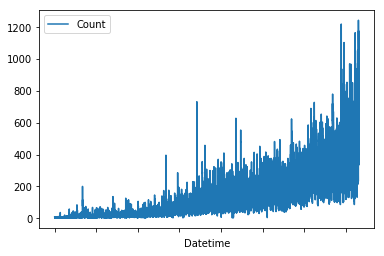

In [10]:
train1.plot()

In [11]:
train1 = train.copy()
test1 = test.copy()


In [12]:
train = pd.read_csv("../input/Train_SU63ISt.csv")
test = pd.read_csv("../input/Test_0qrQsBZ.csv")

In [13]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [14]:
train_original=train.copy() 
test_original=test.copy()

In [15]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [16]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [17]:
i.describe()

,ID,Count,year,month,day,Hour
count,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000
mean,9143.500000,138.958115,2013.182415,6.620735,15.744094,11.500000
std,5279.435197,153.467461,0.698390,3.406007,8.803358,6.922376
min,0.000000,2.000000,2012.000000,1.000000,1.000000,0.000000
25%,4571.750000,22.000000,2013.000000,4.000000,8.000000,5.750000
50%,9143.500000,84.000000,2013.000000,7.000000,16.000000,11.500000
75%,13715.250000,210.000000,2014.000000,9.000000,23.000000,17.250000
max,18287.000000,1244.000000,2014.000000,12.000000,31.000000,23.000000


In [18]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 7 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
year        18288 non-null int64
month       18288 non-null int64
day         18288 non-null int64
Hour        18288 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 1000.2 KB


In [19]:
i.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [20]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [21]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2


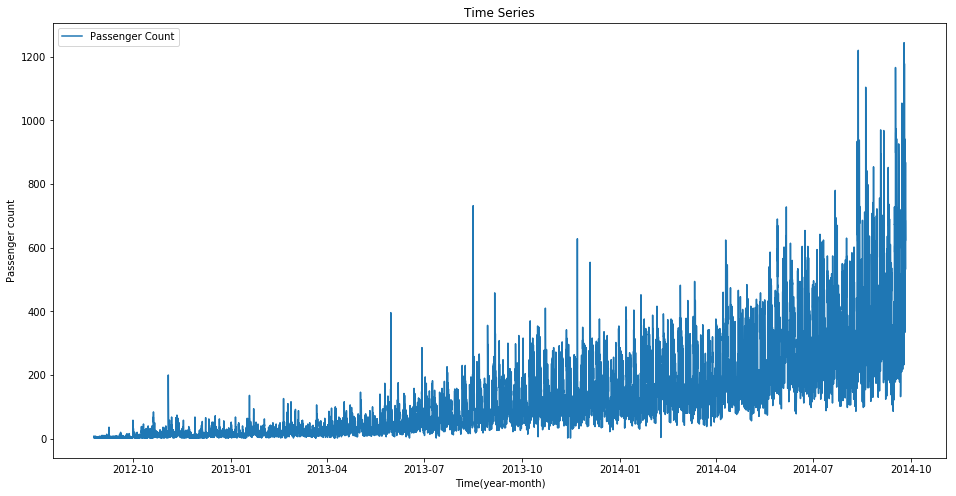

In [22]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')


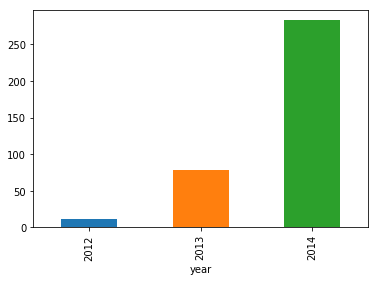

In [23]:
train.groupby('year')['Count'].mean().plot.bar()

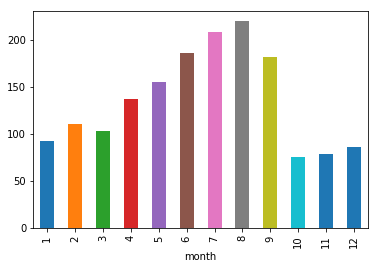

In [24]:
train.groupby('month')['Count'].mean().plot.bar()

temp=train.groupby(['year', 'month'])['Count'].mean() 

temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

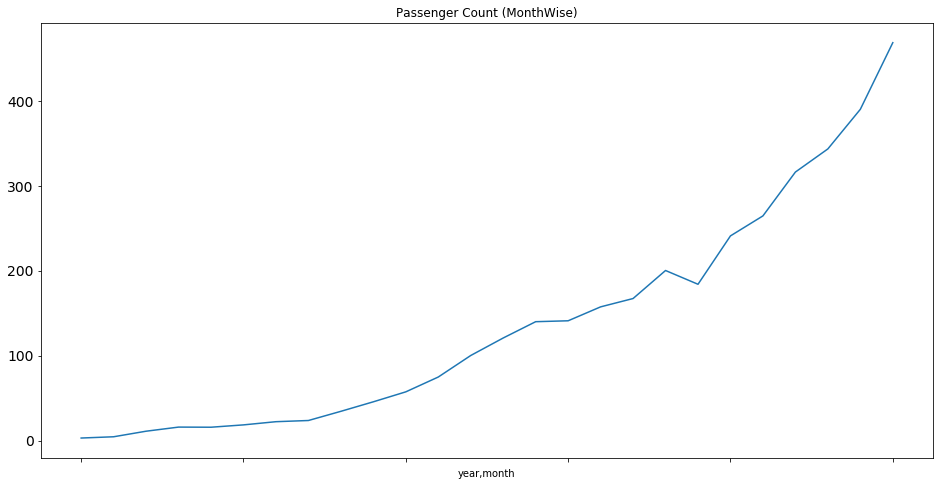

In [25]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(16,8),title='Passenger Count (MonthWise)',fontsize = 14)

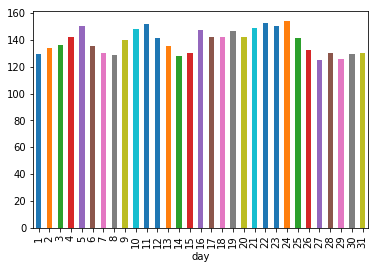

In [26]:
train.groupby('day')['Count'].mean().plot.bar()

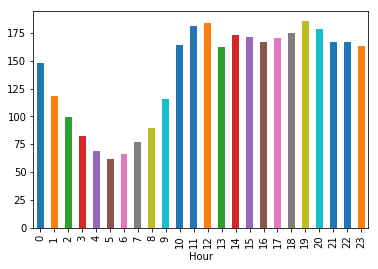

In [27]:
train.groupby('Hour')['Count'].mean().plot.bar()

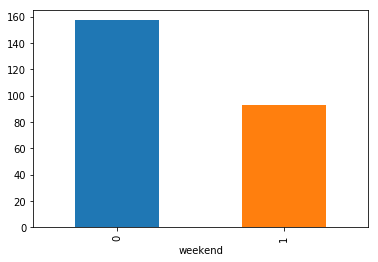

In [28]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [29]:
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']


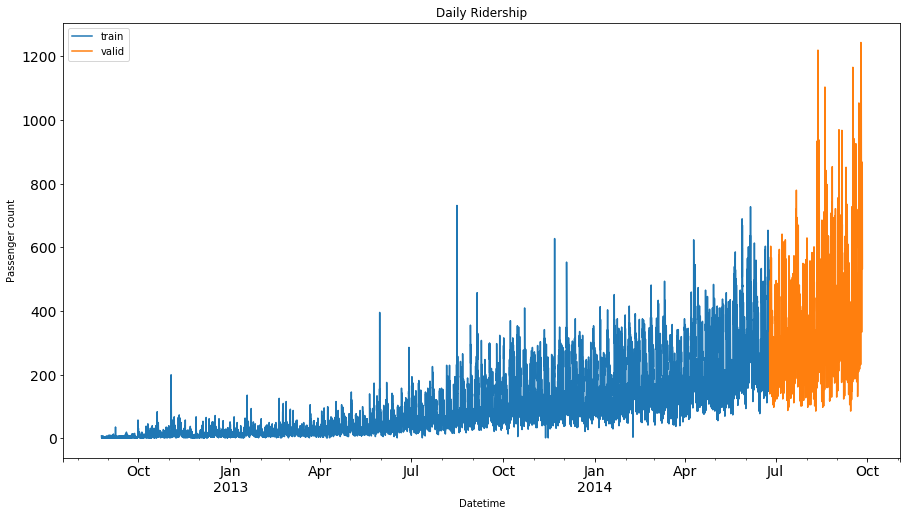

In [30]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count")
plt.legend(loc='best') 
plt.show()


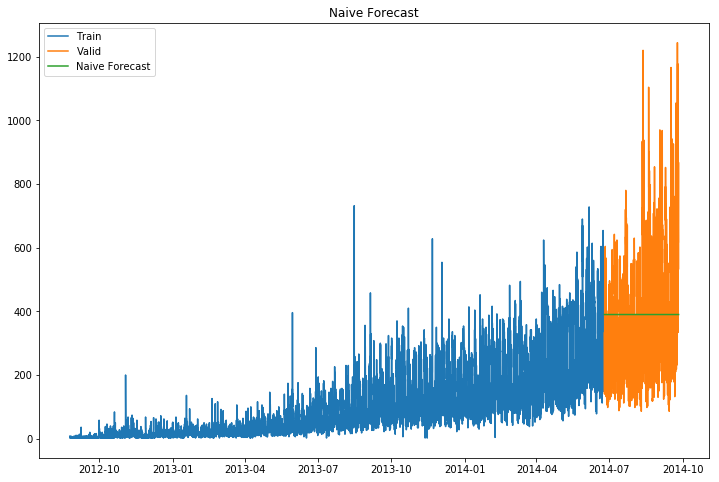

In [31]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()


In [32]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

186.37368520699056


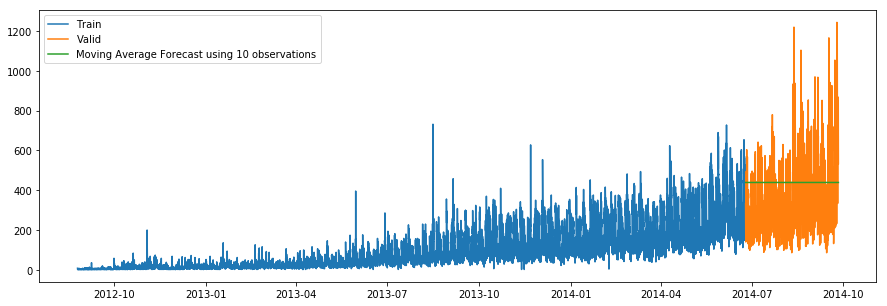

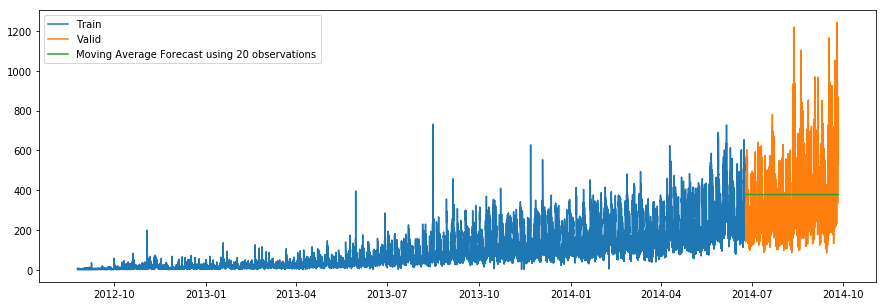

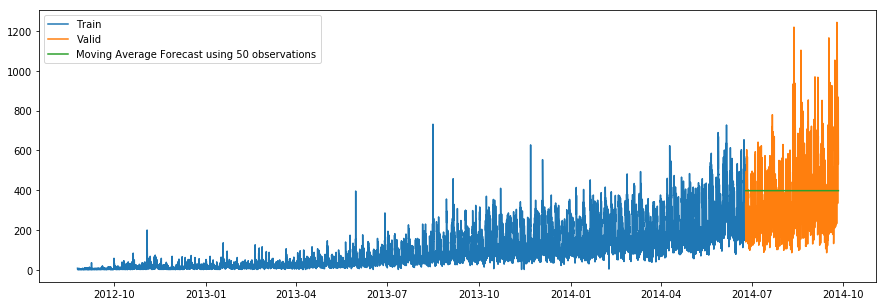

In [33]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()


In [34]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

186.5773761711873


https://courses.analyticsvidhya.com/courses/take/creating-time-series-forecast-using-python/texts/6142791-parameter-tuning-for-arima-model

What else can be tried to improve your model further?
You can try to make a weekly time series and make predictions for that series and then distribute those predictions into daily and then hourly predictions.

Use combination of models(ensemble) to reduce the rmse. To read more about ensemble techniques you can refer these articles:

https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/

https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/

To read further about the time series analysis you can refer these articles:

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

Discussion thread - https://discuss.analyticsvidhya.com/t/welcome-to-practice-problem-time-series-analysis/66154


In [35]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    rolstd = pd.rolling_std(timeseries, window=24)
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

AttributeError: module 'pandas' has no attribute 'rolling_mean'